In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np


In [ ]:
def plot_accuracy(epochs, train_accuracies, val_accuracies):
    epochs = np.arange(5) + 1
    plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    from matplotlib import ticker
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.title('''Training and validation accuracy with VGG16 and 1K training data points''')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0.95, 1)  
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)
                               for x in plt.gca().get_yticks()])
    plt.legend()
    plt.grid('off')
    plt.show()

/tmp/ipykernel_14371/912932216.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)


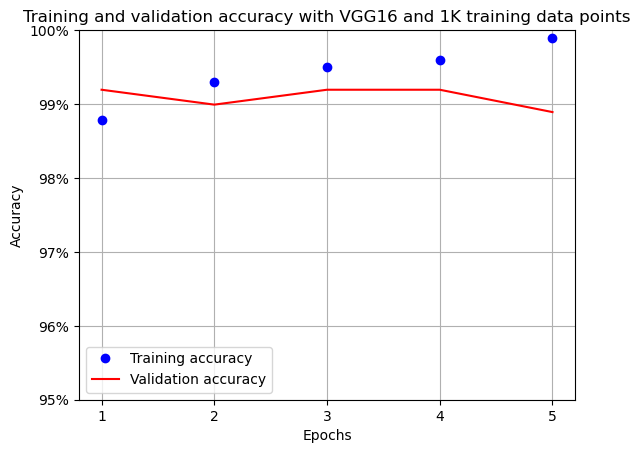

In [47]:
data = np.load('vgg16_data.npz')
plot_accuracy(5, data['train_accuracies'], data['val_accuracies'])

/tmp/ipykernel_8195/177417331.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)


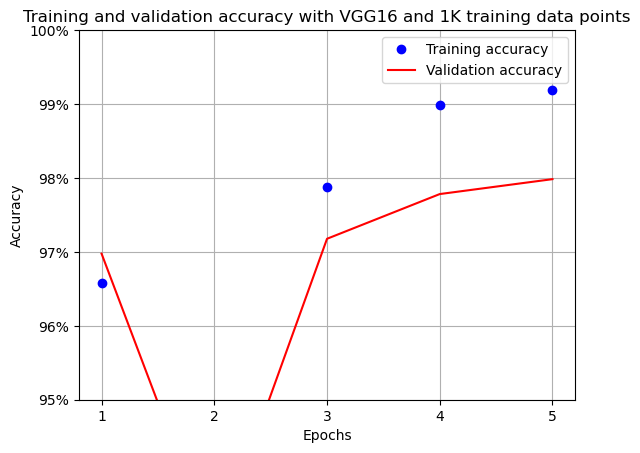

In [4]:
data = np.load('resnet18_data.npz')
plot_accuracy(5, data['train_accuracies'], data['val_accuracies'])

In [24]:
import pandas as pd 
from copy import deepcopy
import numpy as np 
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('data/training_frames_keypoints.csv')
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
train[:2]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
3177,Penelope_Ann_Miller_02.jpg,28.0,96.0,30.0,102.0,34.0,111.0,38.0,118.0,45.0,...,83.0,112.0,88.0,112.0,83.0,114.0,79.0,114.0,77.0,114.0
2475,Baburam_Bhattari_22.jpg,56.0,77.0,54.0,88.0,54.0,96.0,56.0,105.0,58.0,...,73.0,109.0,83.0,108.0,73.0,109.0,71.0,109.0,69.0,109.0


In [41]:
train.reset_index(drop=True)[:2]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,Penelope_Ann_Miller_02.jpg,28.0,96.0,30.0,102.0,34.0,111.0,38.0,118.0,45.0,...,83.0,112.0,88.0,112.0,83.0,114.0,79.0,114.0,77.0,114.0
1,Baburam_Bhattari_22.jpg,56.0,77.0,54.0,88.0,54.0,96.0,56.0,105.0,58.0,...,73.0,109.0,83.0,108.0,73.0,109.0,71.0,109.0,69.0,109.0


In [42]:
kp = deepcopy(df.iloc[0, 1:].tolist())

In [43]:
kp_x = np.array(kp[0::2]).tolist()
kp_y = np.array(kp[1::2]).tolist()

In [44]:
kp_x[:5]

[45.0, 47.0, 49.0, 53.0, 56.0]

In [45]:
kp_y[:5]

[98.0, 106.0, 110.0, 119.0, 125.0]

In [38]:
kp_x[:5] + kp_y[:5]

[45.0, 47.0, 49.0, 53.0, 56.0, 98.0, 106.0, 110.0, 119.0, 125.0]

In [68]:
import torchvision 
import torch.nn as nn
model = torchvision.models.vgg16(pretrained=True)

/home/p/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/p/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [69]:
model.avgpool

AdaptiveAvgPool2d(output_size=(7, 7))

In [70]:
model.avgpool = nn.Sequential( nn.Conv2d(512,512,3),
nn.MaxPool2d(2),
nn.Flatten())

In [71]:
model.avgpool

Sequential(
  (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Flatten(start_dim=1, end_dim=-1)
)

In [4]:
epochs = np.arange(50) + 1
data = np.load('face_keypoints.npz')

In [9]:
list(data.keys())

['train_loss', 'test_loss']

In [5]:
train_loss = data['train_loss']

In [10]:
test_loss = data['test_loss']

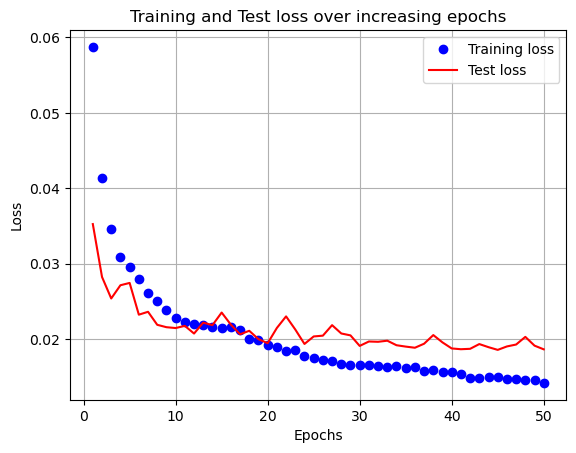

In [20]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'r', label='Test loss')
plt.title('Training and Test loss over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()

In [36]:
from train_face_keypoints import get_data, get_model
import torch
_, _, train_dataset, test_dataset = get_data(df)
model, _, _ = get_model()
model.load_state_dict(torch.load('face_keypoints_vgg16.pth'))

/home/p/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/p/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

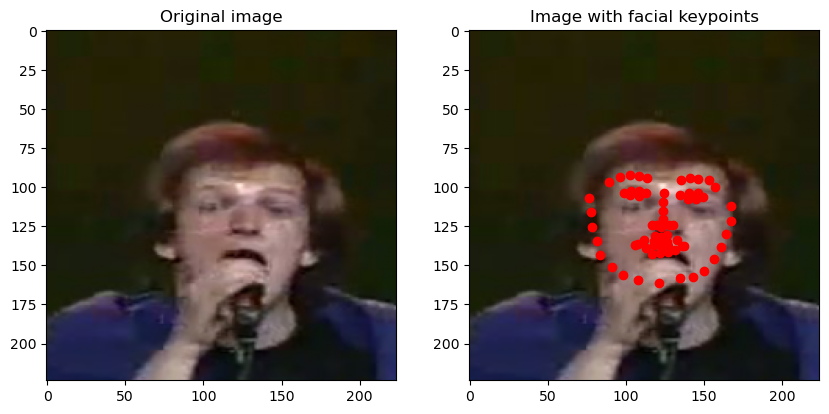

In [37]:
ix = 0
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title('Original image')
im = test_dataset.load_img(ix)
plt.imshow(im)
plt.grid(False)
plt.subplot(222)
plt.title('Image with facial keypoints')
x, _ = test_dataset[ix]
plt.imshow(im)
kp = model(x[None]).flatten().detach().cpu()
plt.scatter(kp[:68]*224, kp[68:]*224, c='r')
plt.grid(False)
plt.show()